Name : Jainam Rajput

SAP ID : 60009200022

Div/Batch : K/K1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'/content/Daily_Electricity_Consumption.csv')
df.head()

,Date,usage,cost
0,2016-10-22,4.52,0.60
1,2016-10-23,23.32,4.36
2,2016-10-24,7.16,1.20
3,2016-10-25,8.68,1.60
4,2016-10-26,5.04,0.84


In [3]:
df.shape

(733, 3)

In [4]:
X = df['usage']
test = X.iloc[-30:] #Data expected for last 30 days
train = X.iloc[:-30]

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
# from sklearn.metrics import mean_squared_error

def timeseries_evaluation_metrics_func(y_true, y_pred):
    print('Evaluation metric results:-')
    print(f'MSE is : {mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {mean_absolute_error(y_true, y_pred)}') 
    print(f'RMSE is : {mean_squared_error(y_true, y_pred,squared=False)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {r2_score(y_true, y_pred)}',end='\n\n') 

## Simple Exponential Smoothening

In [6]:
from statsmodels.tsa.api import SimpleExpSmoothing
result = []
temp_df = pd.DataFrame()
#df2 = pd.DataFrame(columns=['smoothing parameter', 'RMSE'])
for i in [0 , 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90,1]:
    print(f'Fitting for smoothing level= {i}')
    fit_v = SimpleExpSmoothing(np.asarray(train)).fit(i)
    fcst_pred_v= fit_v.forecast(30)
    timeseries_evaluation_metrics_func(test,fcst_pred_v)
    rmse = mean_squared_error(test, fcst_pred_v,squared=False)
    df3 = {'smoothing parameter':i, 'RMSE': rmse}
    temp_df = temp_df.append(df3, ignore_index=True)
temp_df.sort_values(by=['RMSE'])

Fitting for smoothing level= 0
Evaluation metric results:-
MSE is : 30.17652058385577
MAE is : 4.771071118633597
RMSE is : 5.493315991626166
MAPE is : 1.8477682590924185
R2 is : -2.7682624774463966

Fitting for smoothing level= 0.1
Evaluation metric results:-
MSE is : 9.75197309823712
MAE is : 2.072493922207042
RMSE is : 3.122814931794249
MAPE is : 1.102135255342141
R2 is : -0.217767774287853

Fitting for smoothing level= 0.2
Evaluation metric results:-
MSE is : 8.322411483310482
MAE is : 1.9592449507908896
RMSE is : 2.8848590057939543
MAPE is : 0.9909455492479134
R2 is : -0.03925271395290797

Fitting for smoothing level= 0.3
Evaluation metric results:-
MSE is : 8.009727847643022
MAE is : 2.079460859622758
RMSE is : 2.830146259055002
MAPE is : 0.9401642213839714
R2 is : -0.00020666130005264627

Fitting for smoothing level= 0.4
Evaluation metric results:-
MSE is : 8.067572043331515
MAE is : 2.19330312738262
RMSE is : 2.8403471695078957
MAPE is : 0.9189048651779662
R2 is : -0.00742989671

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handl

Evaluation metric results:-
MSE is : 8.335759676396204
MAE is : 2.3261605766202433
RMSE is : 2.88717157030825
MAPE is : 0.8945842005830288
R2 is : -0.04091955605973285

Fitting for smoothing level= 0.7
Evaluation metric results:-
MSE is : 8.558731507395793
MAE is : 2.4053186418580808
RMSE is : 2.925530978710667
MAPE is : 0.8836167221068388
R2 is : -0.06876293786872689

Fitting for smoothing level= 0.8
Evaluation metric results:-
MSE is : 8.906936499005583
MAE is : 2.5014615056685776
RMSE is : 2.98444911147863
MAPE is : 0.8702959722083574
R2 is : -0.11224468390689313

Fitting for smoothing level= 0.9
Evaluation metric results:-
MSE is : 9.451383571865062
MAE is : 2.6310463960610577
RMSE is : 3.0743102595322194
MAPE is : 0.855766135863134
R2 is : -0.18023196129729935

Fitting for smoothing level= 1
Evaluation metric results:-
MSE is : 10.290186666666669
MAE is : 2.809333333333334
RMSE is : 3.2078320820558344
MAPE is : 0.8413832163976216
R2 is : -0.2849766491191892



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


,smoothing parameter,RMSE
3,0.3,2.830146
4,0.4,2.840347
5,0.5,2.860874
2,0.2,2.884859
6,0.6,2.887172
7,0.7,2.925531
8,0.8,2.984449
9,0.9,3.074310
1,0.1,3.122815
10,1.0,3.207832


In [10]:
fitSES = SimpleExpSmoothing(np.asarray(train)).fit(smoothing_level = 0.1,optimized= False)
fcst_gs_pred = fitSES.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_gs_pred)

Evaluation metric results:-
MSE is : 9.75197309823712
MAE is : 2.072493922207042
RMSE is : 3.122814931794249
MAPE is : 1.102135255342141
R2 is : -0.217767774287853



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [11]:
fitSESauto = SimpleExpSmoothing(np.asarray(train)).fit( optimized= True, use_brute = True)
fcst_auto_pred = fitSESauto.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_auto_pred)

Evaluation metric results:-
MSE is : 8.017606351551004
MAE is : 2.0577850349194544
RMSE is : 2.831537806837656
MAPE is : 0.9445709931849682
R2 is : -0.00119048150465062



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [12]:
fitSESauto.summary()

Dep. Variable:,endog,No. Observations:,703
Model:,SimpleExpSmoothing,SSE,21164.784
Optimized:,True,AIC,2397.530
Trend:,None,BIC,2406.641
Seasonal:,None,AICC,2397.587
Seasonal Periods:,None,Date:,"Mon, 05 Dec 2022"
Box-Cox:,False,Time:,04:48:32
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2856907,alpha,True
initial_level,9.8307242,l.0,True


In [13]:
df.shape

(733, 3)

In [14]:
df_fcst_gs_pred = pd.DataFrame(fcst_gs_pred, columns=['Close_grid_Search'])
df_fcst_gs_pred["new_index"] = range(733, 763)
df_fcst_gs_pred = df_fcst_gs_pred.set_index("new_index")

In [15]:
df_fcst_auto_pred = pd.DataFrame(fcst_auto_pred, columns=['Close_auto_search'])
df_fcst_auto_pred["new_index"] = range(733, 763)
df_fcst_auto_pred = df_fcst_auto_pred.set_index("new_index")

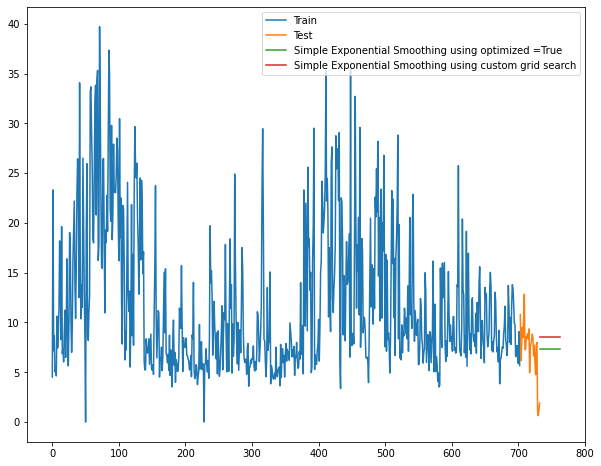

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10,8]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(df_fcst_auto_pred, label='Simple Exponential Smoothing using optimized =True')
plt.plot(df_fcst_gs_pred, label='Simple Exponential Smoothing using custom grid search')
plt.legend(loc='best')
plt.show()

## Double Exponential Smoothening

In [17]:
from statsmodels.tsa.api import ExponentialSmoothing, Holt
from timeit import default_timer as timer

In [18]:
from sklearn.model_selection import ParameterGrid
param_grid = {'smoothing_level': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90], 'smoothing_slope':[0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],
              'damping_slope': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],'damped' : [True, False]}
pg = list(ParameterGrid(param_grid))

In [21]:
df_results_moni = pd.DataFrame(columns=['smoothing_level', 'smoothing_slope', 'damping_slope','damped','MAPE','r2'])
start = timer()
for a,b in enumerate(pg):
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    # print(smoothing_level, smoothing_slope, damping_slope,damped)
    fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
    #fit1.summary
    z = fit1.forecast(30)
    # print(z)
    df_pred = pd.DataFrame(z, columns=['Forecasted_result'])
    mape = mean_absolute_percentage_error(test, df_pred.Forecasted_result)
    # RMSE = np.sqrt(mean_absolute_percentage_error(test, df_pred.Forecasted_result))
    r2 = r2_score(test, df_pred.Forecasted_result)
    print( f'MAPE is {mean_absolute_percentage_error(test, df_pred.Forecasted_result)}\n')
    df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'MAPE': mape,'r2':r2}, ignore_index=True)
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')

<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython

MAPE is 1.100615479142355

MAPE is 1.099092573632952

MAPE is 1.097566523640606

MAPE is 1.0960632471382081

MAPE is 1.0945991417580656

MAPE is 1.0931320734397252

MAPE is 1.091662081239925

MAPE is 1.0901892154679713

MAPE is 1.0887135369090808

MAPE is 0.9891447379527729



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.9873613267016539

MAPE is 0.9857121613880481

MAPE is 0.9840906469321564

MAPE is 0.9825085841390534

MAPE is 0.9810450189801266

MAPE is 0.9795970518900788

MAPE is 0.9781647809751081

MAPE is 0.9767482901366421

MAPE is 0.9392041003632888

MAPE is 0.9382645483798492



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.9373451841876761

MAPE is 0.9364456225716453

MAPE is 0.9355654750975719

MAPE is 0.9347043508144992

MAPE is 0.9338618569116274

MAPE is 0.933037599332227

MAPE is 0.93223118334679

MAPE is 0.9182027760380082

MAPE is 0.9175173639033093

MAPE is 0.9168479043252525

MAPE is 0.9161936886683679

MAPE is 0.9155540242620125

MAPE is 0.9149282345078363

MAPE is 0.9143156589465852

MAPE is 0.9137156532875305

MAPE is 0.9131275894035894

MAPE is 0.9051217046549509

MAPE is 0.9045091888113946



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.9039026478759354

MAPE is 0.9033013733222333

MAPE is 0.9027046858602794

MAPE is 0.9021119346022082

MAPE is 0.9015224962199162

MAPE is 0.9009357740974443

MAPE is 0.9003511974808122

MAPE is 0.8939501194497398

MAPE is 0.8933128851846928



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.8926720049321308

MAPE is 0.8920270127932792

MAPE is 0.8913774683771359

MAPE is 0.8907229553933721

MAPE is 0.8900630802884835

MAPE is 0.889397470926081

MAPE is 0.888725775311966

MAPE is 0.8827504697578238

MAPE is 0.8818729104968702



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.88098367878753

MAPE is 0.8800824274357859

MAPE is 0.8791688259604661

MAPE is 0.8782425590599588

MAPE is 0.8773033251725456

MAPE is 0.876350835127536

MAPE is 0.8753848108842763

MAPE is 0.8690850051660661

MAPE is 0.8678542489265391



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.866603348182982

MAPE is 0.8653319552452448

MAPE is 0.8641754387843539

MAPE is 0.8630781753354072

MAPE is 0.8619629542792402

MAPE is 0.8608295019922774

MAPE is 0.8596775472822417

MAPE is 0.854372317143725

MAPE is 0.8529533653826904



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureW

MAPE is 0.8515089018309829

MAPE is 0.8500385494160351

MAPE is 0.8488129818188507

MAPE is 0.8476081518447824

MAPE is 0.8463819582981443

MAPE is 0.8451341069370424

MAPE is 0.8438643044837675

MAPE is 1.0986780396784435

MAPE is 1.0952652426447422



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.0919264919337235

MAPE is 1.0885704763339823

MAPE is 1.0851978877432145

MAPE is 1.0818711013721978

MAPE is 1.078628423251648

MAPE is 1.0753732209248676

MAPE is 1.072106902258946

MAPE is 0.9868485051784196

MAPE is 0.9831036456593452



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.9797016371064016

MAPE is 0.9764062100185129

MAPE is 0.9731913979629069

MAPE is 0.9700582148788446

MAPE is 0.967007341793257

MAPE is 0.9640391540078987

MAPE is 0.9612589610756545

MAPE is 0.9379587913041648

MAPE is 0.935860804697904



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.9338662347329737

MAPE is 0.9319709329329132

MAPE is 0.9301706686614332

MAPE is 0.9284611634752725

MAPE is 0.9268381209010332

MAPE is 0.9252972521440342

MAPE is 0.9238342981894779

MAPE is 0.9173105201772659

MAPE is 0.9158081763272953



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.9143897860095129

MAPE is 0.9130476420818122

MAPE is 0.9117743906964535

MAPE is 0.9105630391717983

MAPE is 0.9094069596885974

MAPE is 0.9082998894695492

MAPE is 0.9072359280064926

MAPE is 0.9043808314579441

MAPE is 0.9030656741096478



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.9017869473823072

MAPE is 0.9005368481624707

MAPE is 0.8993082510230582

MAPE is 0.8980946722718595

MAPE is 0.8968902325637733

MAPE is 0.8957194789819796

MAPE is 0.8946779833281427

MAPE is 0.8932354572499902

MAPE is 0.8918827015192263



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.8905201085428857

MAPE is 0.8891425457818262

MAPE is 0.887745503758372

MAPE is 0.8863250298274346

MAPE is 0.8848776653777389

MAPE is 0.8834003867558007

MAPE is 0.881890550104279

MAPE is 0.8818036681275718



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.879948719453357

MAPE is 0.8780476956523431

MAPE is 0.8760969493549065

MAPE is 0.8740932795062929

MAPE is 0.8720338534879688

MAPE is 0.8699161378190944

MAPE is 0.8677378370511553

MAPE is 0.8654968403962454

MAPE is 0.867777865480353

MAPE is 0.8651804696433987

MAPE is 0.862838765634189

MAPE is 0.8605096590200872

MAPE is 0.8581053806835263

MAPE is 0.8556234305388829

MAPE is 0.8530613889830843

MAPE is 0.8504168828820052

MAPE is 0.8480631511660505

MAPE is 0.8528553138382825



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.8498407286576152

MAPE is 0.8473519418040569

MAPE is 0.8447881931854081

MAPE is 0.8421338300827522

MAPE is 0.8393861378987498

MAPE is 0.8365424085385951

MAPE is 0.8335999347490225

MAPE is 0.8305560095605331

MAPE is 1.0961492438068796



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.0903466295629591

MAPE is 1.0844833681413921

MAPE is 1.0787776479744442

MAPE is 1.0730882041713867

MAPE is 1.067502030350859

MAPE is 1.0621375967959732

MAPE is 1.056929231649338

MAPE is 1.0517080311614495

MAPE is 0.9839586090706326



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.9778848664317472

MAPE is 0.9721398513707655

MAPE is 0.9666343868544103

MAPE is 0.9614587359425489

MAPE is 0.9568836755827815

MAPE is 0.9525353182891181

MAPE is 0.9484122952017883

MAPE is 0.9445116954013723

MAPE is 0.9362648734648321



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.9326905697785567

MAPE is 0.9294231737160439

MAPE is 0.9264433232167502

MAPE is 0.9237309464963123

MAPE is 0.9212656751148404

MAPE is 0.919027172243537

MAPE is 0.9169953913546888

MAPE is 0.9151507780373229

MAPE is 0.9161025329397698



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.9135948859813452

MAPE is 0.9113430825136604

MAPE is 0.9093105351116475

MAPE is 0.9074631453468248

MAPE is 0.9057694365437913

MAPE is 0.9042006079075218

MAPE is 0.9027305280330986

MAPE is 0.9013356818885754

MAPE is 0.9034243199721509



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.9012756412392622

MAPE is 0.8992516705696912

MAPE is 0.8973145486956835

MAPE is 0.8954930716219403

MAPE is 0.8938827624114148

MAPE is 0.8922743349084197

MAPE is 0.8906506128436573

MAPE is 0.8889974406612636

MAPE is 0.892371355971354



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.8901845105353663

MAPE is 0.8879926268303487

MAPE is 0.8857703833187561

MAPE is 0.8834974081894157

MAPE is 0.8811575392352646

MAPE is 0.878738126704553

MAPE is 0.8762293905088185

MAPE is 0.8736238388184302

MAPE is 0.8807059703447963

MAPE is 0.8777175615764692



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.8746289377755367

MAPE is 0.8714225093032303

MAPE is 0.8680845775910423

MAPE is 0.8646043941689115

MAPE is 0.8611660751944383

MAPE is 0.8579327193606908

MAPE is 0.8545596111702243

MAPE is 0.8662923741190117

MAPE is 0.8624318388677821



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.8587085717784056

MAPE is 0.8548091615169198

MAPE is 0.8507230965714623

MAPE is 0.8470060598661182

MAPE is 0.8434332374332593

MAPE is 0.8396906772552264

MAPE is 0.8357715426231028

MAPE is 0.8511085145087456

MAPE is 0.8469217021395857



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.8428187585633963

MAPE is 0.8385001087972245

MAPE is 0.8339549953928157

MAPE is 0.8291729019114586

MAPE is 0.8241433288435837

MAPE is 0.8188556787895039

MAPE is 0.8132992266872882

MAPE is 1.0928077947056818

MAPE is 1.0835425866582307



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.0745288123039556

MAPE is 1.0656353829324665

MAPE is 1.0572337389568183

MAPE is 1.0488423276152512

MAPE is 1.0404166212180332

MAPE is 1.03199091846421

MAPE is 1.0236004314921294

MAPE is 0.9800995214621825

MAPE is 0.9706584273136571

MAPE is 0.9618294480094344



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.9542709912628091

MAPE is 0.9472700300053275

MAPE is 0.9413859624216424

MAPE is 0.936653603266046

MAPE is 0.9323535386321539

MAPE is 0.9284696261265737

MAPE is 0.9338153614351195

MAPE is 0.9282715498095618

MAPE is 0.9234754953976851

MAPE is 0.9193618812959427



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.9158613032920435

MAPE is 0.9129031343273506

MAPE is 0.910417585028715

MAPE is 0.9083371693510283

MAPE is 0.9065977303966267

MAPE is 0.9143290639614956

MAPE is 0.9105299804336852

MAPE is 0.9073723139845492

MAPE is 0.9047293747973781



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.9024853848964146

MAPE is 0.9005367019727064

MAPE is 0.8987922896235807

MAPE is 0.8971736561619802

MAPE is 0.8956321715660907

MAPE is 0.9020554031034094

MAPE is 0.8988760537680013

MAPE is 0.8960423884893899

MAPE is 0.893744583765821



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.8915545357210068

MAPE is 0.8893731917884907

MAPE is 0.8871409379588477

MAPE is 0.8848133148621858

MAPE is 0.8823587374502815

MAPE is 0.8912108692827992

MAPE is 0.8880056257329417

MAPE is 0.8848451843995799

MAPE is 0.8816358733969748

MAPE is 0.8783091780725466



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.8748171892040495

MAPE is 0.8711282381184319

MAPE is 0.8672228994659347

MAPE is 0.8630904695896219

MAPE is 0.8793117367267963

MAPE is 0.8749392020784335

MAPE is 0.8704045254375848

MAPE is 0.8656419643827774

MAPE is 0.8606074179948404



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.8558945131878549

MAPE is 0.850988559790991

MAPE is 0.8462550925478187

MAPE is 0.841859642452295

MAPE is 0.8644659320962623

MAPE is 0.8590710591091943

MAPE is 0.8534808656644854

MAPE is 0.8477992719447346

MAPE is 0.842744505434641

MAPE is 0.8373670453053584

MAPE is 0.8316499425648988

MAPE is 0.82557664746626

MAPE is 0.8191296923307994

MAPE is 0.8490677135332263

MAPE is 0.8432621926081356

MAPE is 0.8370639354905214



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.8304366714208163

MAPE is 0.8233495481966242

MAPE is 0.8157738733523037

MAPE is 0.8077782063619042

MAPE is 0.8017093346066925

MAPE is 0.7980712153287963

MAPE is 1.0879805504985711

MAPE is 1.0740085758034779

MAPE is 1.0605482318061337



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.0474803084398758

MAPE is 1.0342244043569493

MAPE is 1.0210624590986208

MAPE is 1.0085607896489202

MAPE is 0.9969048135472891

MAPE is 0.9860796983407566

MAPE is 0.9744431741618427

MAPE is 0.9601267405741567

MAPE is 0.9480318816199557



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.9384370774244601

MAPE is 0.930749755656602

MAPE is 0.9240802406784856

MAPE is 0.9183904204248019

MAPE is 0.9136248986461717

MAPE is 0.9097170381483214

MAPE is 0.9299829201074595

MAPE is 0.9216300286316923

MAPE is 0.9149607686416265



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.9097878106608223

MAPE is 0.9059045369629001

MAPE is 0.90310004356971

MAPE is 0.9011687431073361

MAPE is 0.8999165008532796

MAPE is 0.8991645039651567

MAPE is 0.9114467548232289

MAPE is 0.9058786021240793

MAPE is 0.9018034121490911



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.8988441484090622

MAPE is 0.8966600407078281

MAPE is 0.8950528385029071

MAPE is 0.8937698705466803

MAPE is 0.8925108122528814

MAPE is 0.891139853765421

MAPE is 0.8998188315914553

MAPE is 0.8953628621508278

MAPE is 0.8921985479897311



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.8894360662029578

MAPE is 0.8867894368817297

MAPE is 0.8840460516247337

MAPE is 0.8810583573757585

MAPE is 0.8777338193801436

MAPE is 0.8740243061562983

MAPE is 0.8894015666185191

MAPE is 0.8848772128830059

MAPE is 0.8805880716359463



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.8762287480062632

MAPE is 0.8715949056272765

MAPE is 0.8665634314807937

MAPE is 0.8610723136809145

MAPE is 0.8551019849905754

MAPE is 0.8488041724255104

MAPE is 0.8772750571162062

MAPE is 0.8710987003382035

MAPE is 0.8647367401645826

MAPE is 0.8579661160812346



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.8513098029935031

MAPE is 0.8448724478757115

MAPE is 0.8387832481051819

MAPE is 0.8322456212931328

MAPE is 0.8252571473207017

MAPE is 0.8620215430898728

MAPE is 0.8544032405958106

MAPE is 0.8466890244141662

MAPE is 0.8396553664320765

MAPE is 0.8320447649033873



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.8238159866736026

MAPE is 0.8149385057276197

MAPE is 0.8053819733457537

MAPE is 0.798228261636852

MAPE is 0.8466135876529337

MAPE is 0.8382065882650593

MAPE is 0.8291312445384877

MAPE is 0.8192758187102617

MAPE is 0.8085621134471664



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.79979671274306

MAPE is 0.7946117995960353

MAPE is 0.788995705425858

MAPE is 0.7829186036526867

MAPE is 1.0806373312398134

MAPE is 1.059691625247961

MAPE is 1.0390449126294543

MAPE is 1.0180626598596485

MAPE is 0.9983285355873377



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.9807654366726642

MAPE is 0.9653653402617542

MAPE is 0.9520789528105175

MAPE is 0.9402925739687081

MAPE is 0.965182797346868

MAPE is 0.9441843417673944

MAPE is 0.9293635846443142

MAPE is 0.9170363051093643

MAPE is 0.9070374476398801



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.8992782713379587

MAPE is 0.8938248996377481

MAPE is 0.8905425976822693

MAPE is 0.8887034189997696

MAPE is 0.9233463109881597

MAPE is 0.9105559277237367

MAPE is 0.9015031983860629

MAPE is 0.8956939772464183

MAPE is 0.8929451559385894

MAPE is 0.892026076204189



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.8924164401873759

MAPE is 0.8936628663224118

MAPE is 0.895362247380035

MAPE is 0.9061500066714923

MAPE is 0.8978875987486623

MAPE is 0.8934068747613002

MAPE is 0.891312531226124

MAPE is 0.8904811879118427

MAPE is 0.8902148473935912



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.8899538081638347

MAPE is 0.8892766387483911

MAPE is 0.8878911605873944

MAPE is 0.8955818313395518

MAPE is 0.8899539561180438

MAPE is 0.8862712785624908

MAPE is 0.8834713636155852

MAPE is 0.8807440422766227



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.8775262127989253

MAPE is 0.8734741587644576

MAPE is 0.8684252783132272

MAPE is 0.8623562203226147

MAPE is 0.8860031432245947

MAPE is 0.8796123790831931

MAPE is 0.8740791306461365

MAPE is 0.8684585023533165



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.8621595445144828

MAPE is 0.8548777162659198

MAPE is 0.8465175896969644

MAPE is 0.8386341046302724

MAPE is 0.8309960818207185

MAPE is 0.8736643101040967

MAPE is 0.8649178968451812

MAPE is 0.8561738400311655

MAPE is 0.8470535713307156



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.83904937203271

MAPE is 0.8303460152621949

MAPE is 0.8207495574373692

MAPE is 0.8103001158250049

MAPE is 0.7994622915394394

MAPE is 0.8580431808402277

MAPE is 0.8470817279585241

MAPE is 0.8375769876523455

MAPE is 0.82714958512173



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.815609573135368

MAPE is 0.8028825256220535

MAPE is 0.7937110105190945

MAPE is 0.7870395895010671

MAPE is 0.7797935551251824

MAPE is 0.8425707072981229

MAPE is 0.8302512223149748

MAPE is 0.8169022948863257

MAPE is 0.8027790085039813

MAPE is 0.7935075040833041



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.7856388901653261

MAPE is 0.7769727517692113

MAPE is 0.7674503396464477

MAPE is 0.7570021834460449

MAPE is 1.0686432443300569

MAPE is 1.0353222172273349

MAPE is 1.0010177663046578

MAPE is 0.9707062973027069

MAPE is 0.9446603460917534

MAPE is 0.9245118061038333



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.9069384966646965

MAPE is 0.8912321143754919

MAPE is 0.8790811143352535

MAPE is 0.9493247815424295

MAPE is 0.9198270555467278

MAPE is 0.8966067678656723

MAPE is 0.8808875571941798

MAPE is 0.8702624360879401

MAPE is 0.8640182904323946

MAPE is 0.8616728001651185



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.8626965394106205

MAPE is 0.8665395865603632

MAPE is 0.9101796365824816

MAPE is 0.8898871695152556

MAPE is 0.8791501478721978

MAPE is 0.8748304897382265

MAPE is 0.875536939023776

MAPE is 0.8798376461053031

MAPE is 0.886365856485382

MAPE is 0.8938861945150517


<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u


MAPE is 0.9022153822637549

MAPE is 0.8949010516648701

MAPE is 0.8834382650435537

MAPE is 0.8792481483000307

MAPE is 0.8798435941267909

MAPE is 0.8829182535509044

MAPE is 0.8865400644839475

MAPE is 0.8892263214304214

MAPE is 0.8899486495263879



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.888094354325459

MAPE is 0.8871595086559025

MAPE is 0.8785773084137432

MAPE is 0.8751904687803506

MAPE is 0.8739108405224026

MAPE is 0.8723975214090289

MAPE is 0.8691081324879103

MAPE is 0.8632204726141119

MAPE is 0.8544972093989902



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.8431332036221608

MAPE is 0.878189148669837

MAPE is 0.8686968690191268

MAPE is 0.8621052151751277

MAPE is 0.8554857308243059

MAPE is 0.8470671682084076

MAPE is 0.8372667492683532

MAPE is 0.8258051391949895

MAPE is 0.8131957871751477

MAPE is 0.7994942965476297

MAPE is 0.8656316517853505

MAPE is 0.852649054415878

MAPE is 0.8413476227539983

MAPE is 0.8311238566874005

MAPE is 0.8190091565847666

MAPE is 0.8048057340828252

MAPE is 0.7902779930632181

MAPE is 0.7807319441818628



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.7714947005421451

MAPE is 0.8495229901975361

MAPE is 0.8350577536543684

MAPE is 0.8208407606576625

MAPE is 0.804855564234837

MAPE is 0.7897011907708602

MAPE is 0.7797792967785073

MAPE is 0.7687176673288604

MAPE is 0.7565266895197933

MAPE is 0.7431654166328177



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.8342281122908806

MAPE is 0.8151281762562481

MAPE is 0.7962668475892095

MAPE is 0.784263708819599

MAPE is 0.7718700209201219

MAPE is 0.7578800444278762

MAPE is 0.7422104063376744

MAPE is 0.7247460493846731

MAPE is 0.7321495319899191



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.047288586116986

MAPE is 0.9866857597486669

MAPE is 0.9314405572369235

MAPE is 0.8867746373600254

MAPE is 0.8513136461030043

MAPE is 0.8223876184630773

MAPE is 0.8010556046944585

MAPE is 0.7841572776887461

MAPE is 0.7731954096013478

MAPE is 0.9185563590317838



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.8662715973404616

MAPE is 0.8305544989523135

MAPE is 0.8108809212298173

MAPE is 0.8027324798379593

MAPE is 0.8037377242938912

MAPE is 0.8117624043658888

MAPE is 0.8256874671899055

MAPE is 0.8443108421568155

MAPE is 0.8798517743193479



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.8440002602247109

MAPE is 0.8300867850894943

MAPE is 0.831015541695113

MAPE is 0.8426229701339781

MAPE is 0.8644290815742656

MAPE is 0.8903042761034751

MAPE is 0.9191744741091024

MAPE is 0.9457073859939645

MAPE is 0.8688271262033764



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.8466355256200521

MAPE is 0.844699916817699

MAPE is 0.8556516865651244

MAPE is 0.8723503783582373

MAPE is 0.8888014515782968

MAPE is 0.9014800608481971

MAPE is 0.9065075657597258

MAPE is 0.9014972035642904

MAPE is 0.8634775109922171

MAPE is 0.8476639061952623



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.8477257054900147

MAPE is 0.8539266777488713

MAPE is 0.8587185410366975

MAPE is 0.8572893692956887

MAPE is 0.847371514153291

MAPE is 0.8300343400630299

MAPE is 0.8078733253267433

MAPE is 0.8555772721497055



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.839304663373554

MAPE is 0.8341575866710034

MAPE is 0.8295488177541758

MAPE is 0.8204203025766846

MAPE is 0.8046889697348912

MAPE is 0.7824444860515489

MAPE is 0.7642940355174408

MAPE is 0.7485535266357008

MAPE is 0.8425723962785555



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.823908717749404

MAPE is 0.8108297046831133

MAPE is 0.7955877134463869

MAPE is 0.7767674441812622

MAPE is 0.7621485236298107

MAPE is 0.7450646124428728

MAPE is 0.725974529588192

MAPE is 0.7053796019718



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.8285203440854504

MAPE is 0.8037135870415211

MAPE is 0.7824522837041549

MAPE is 0.7674631380103524

MAPE is 0.7497923061935485

MAPE is 0.7288274564201801

MAPE is 0.7048715373926666

MAPE is 0.6927440527523335

MAPE is 0.7725724627690308



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.811161969169265

MAPE is 0.7820728062881076

MAPE is 0.7635716672745004

MAPE is 0.7420891524093878

MAPE is 0.7166193000657614

MAPE is 0.6983123135893049

MAPE is 0.7920662359366334

MAPE is 1.0678837391501723

MAPE is 1.3787287847372645



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.0012759888786802

MAPE is 0.8713565450482049

MAPE is 0.7477241165777411

MAPE is 0.6668942364315245

MAPE is 0.6158922100028779

MAPE is 0.6053615976292477

MAPE is 0.6482759842616062

MAPE is 0.6990017980285567



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.73517423191629

MAPE is 0.8292169632927326

MAPE is 0.7135550967338326

MAPE is 0.6658460209458181

MAPE is 0.649299494816512

MAPE is 0.6533797936310154

MAPE is 0.673651921731166

MAPE is 0.708669544603611

MAPE is 0.7573335447474977



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.8356913807748264

MAPE is 0.7856889843948844

MAPE is 0.7138631928642521

MAPE is 0.701609230866725

MAPE is 0.7198777983560386

MAPE is 0.7599059140827802

MAPE is 0.8420977772316067

MAPE is 0.9570899771259787

MAPE is 1.1078813256551372



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.2851525355271265

MAPE is 0.7787222715152804

MAPE is 0.7312114766380545

MAPE is 0.7384524559488183

MAPE is 0.7811964391670817

MAPE is 0.8525820093337099

MAPE is 0.9308952483379515

MAPE is 0.9913752517059914



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.0223012819635415

MAPE is 0.9980634117902566

MAPE is 0.778323830477504

MAPE is 0.7413184207326793

MAPE is 0.7543276771332159

MAPE is 0.794005604366087

MAPE is 0.8286023976600271

MAPE is 0.8424180418171118



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.8213078678620925

MAPE is 0.7722502569886526

MAPE is 0.7099086145015702

MAPE is 0.773306346824128

MAPE is 0.7396557443217078

MAPE is 0.7418040197609702

MAPE is 0.7497861665316571

MAPE is 0.7436372080296301



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.720238006952453

MAPE is 0.6804878512009885

MAPE is 0.6299971987064432

MAPE is 0.6094236733094014

MAPE is 0.7612933299669186

MAPE is 0.7277305286396963

MAPE is 0.7161856709610935

MAPE is 0.7018317606283248

MAPE is 0.6741376890097026

MAPE is 0.6313845662306747



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.6291974187683472

MAPE is 0.8740287119252836

MAPE is 1.1763110735065925

MAPE is 0.7484434490135603

MAPE is 0.7075373146469268

MAPE is 0.6795828574909656

MAPE is 0.6450876444834428

MAPE is 0.6233214686189227

MAPE is 0.8409250571365212



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.1816474143900886

MAPE is 1.5672307436536095

MAPE is 1.9945754701528362

MAPE is 0.7348499640750001

MAPE is 0.6798296109415103

MAPE is 0.6388266091048752

MAPE is 0.7072278408853354

MAPE is 1.0428102724448605

MAPE is 1.455850987091705



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.9421244478138466

MAPE is 2.5012668140573466

MAPE is 3.1391679818426477

MAPE is 0.9790982130292227

MAPE is 0.5419643172387154

MAPE is 1.5960619388763695

MAPE is 3.37541713636881

MAPE is 4.504101859079132

MAPE is 5.023598307202041



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 4.68081072921576

MAPE is 4.0524524895849305

MAPE is 3.691958573961608

MAPE is 0.4975861647254691

MAPE is 1.8229599139346848

MAPE is 2.9587286062582216

MAPE is 3.181481399511453

MAPE is 3.0080648371208736

MAPE is 2.6807092347568613



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 2.0898284022233296

MAPE is 1.155055508408136

MAPE is 0.8233830315883721

MAPE is 0.5588735362527203

MAPE is 1.872563061600805

MAPE is 2.221247548952059

MAPE is 1.851742728370045

MAPE is 1.0161379649727094

MAPE is 0.7563195076130959



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.6875022674221

MAPE is 2.9045572024659245

MAPE is 3.838476860066231

MAPE is 0.6521434658211943

MAPE is 1.5542342636535005

MAPE is 1.4494678840696484

MAPE is 0.7089863450179176

MAPE is 0.7742917719666856

MAPE is 1.4235288636645302

MAPE is 2.0691387613942758



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 2.3447178579161254

MAPE is 2.2066350764897176

MAPE is 0.6563015062177617

MAPE is 1.3029289433178124

MAPE is 1.032349564466375

MAPE is 0.5052034336896989

MAPE is 0.7500136891791609

MAPE is 0.9313105754110624

MAPE is 0.8831222304702823



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.6303250551262249

MAPE is 0.6823075482805974

MAPE is 0.6753511081833575

MAPE is 1.2257145492730268



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.0118707516436023

MAPE is 0.6028829546651927

MAPE is 0.48849154773795395



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.5509793996817598

MAPE is 1.0633623612248748

MAPE is 1.82553400446157

MAPE is 2.692561132869763



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.741785136806611

MAPE is 1.3131839077787242

MAPE is 1.2701575163036152

MAPE is 1.1763177299633107



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is depr

MAPE is 1.3407648428223249

MAPE is 1.828188328637211

MAPE is 2.5655094028031034

MAPE is 3.438246619649321

MAPE is 4.357095120747455

MAPE is 0.8619864375324631

MAPE is 1.5338422947549237

MAPE is 1.7146444392188065

MAPE is 1.9305584449122852

MAPE is 2.4165729739325696



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 3.1883517028658743

MAPE is 4.175629283502485

MAPE is 5.311439140957151

MAPE is 6.56966632638687

MAPE is 1.0373499090284801

MAPE is 1.8705148148103197

MAPE is 2.315771306319874

MAPE is 2.860377232235118

MAPE is 3.696191441051595

MAPE is 4.832629515497487



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 6.2301220515396345

MAPE is 7.867363936770824

MAPE is 9.757238320401942

MAPE is 0.9790982130292227

MAPE is 0.5419643172387154

MAPE is 1.5960619388763695

MAPE is 3.37541713636881

MAPE is 4.504101859079132

MAPE is 5.023598307202041



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 4.68081072921576

MAPE is 4.0524524895849305

MAPE is 3.691958573961608

MAPE is 0.4975861647254691

MAPE is 1.8229599139346848

MAPE is 2.9587286062582216

MAPE is 3.181481399511453

MAPE is 3.0080648371208736

MAPE is 2.6807092347568613



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 2.0898284022233296

MAPE is 1.155055508408136

MAPE is 0.8233830315883721

MAPE is 0.5588735362527203

MAPE is 1.872563061600805

MAPE is 2.221247548952059

MAPE is 1.851742728370045

MAPE is 1.0161379649727094



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.7563195076130959

MAPE is 1.6875022674221

MAPE is 2.9045572024659245

MAPE is 3.838476860066231

MAPE is 0.6521434658211943

MAPE is 1.5542342636535005

MAPE is 1.4494678840696484

MAPE is 0.7089863450179176

MAPE is 0.7742917719666856



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.4235288636645302

MAPE is 2.0691387613942758

MAPE is 2.3447178579161254

MAPE is 2.2066350764897176

MAPE is 0.6563015062177617

MAPE is 1.3029289433178124

MAPE is 1.032349564466375

MAPE is 0.5052034336896989

MAPE is 0.7500136891791609



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.9313105754110624

MAPE is 0.8831222304702823

MAPE is 0.6303250551262249

MAPE is 0.6823075482805974

MAPE is 0.6753511081833575

MAPE is 1.2257145492730268

MAPE is 1.0118707516436023

MAPE is 0.6028829546651927



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.48849154773795395

MAPE is 0.5509793996817598

MAPE is 1.0633623612248748

MAPE is 1.82553400446157

MAPE is 2.692561132869763

MAPE is 0.741785136806611

MAPE is 1.3131839077787242

MAPE is 1.2701575163036152



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.1763177299633107

MAPE is 1.3407648428223249

MAPE is 1.828188328637211

MAPE is 2.5655094028031034

MAPE is 3.438246619649321

MAPE is 4.357095120747455

MAPE is 0.8619864375324631

MAPE is 1.5338422947549237



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.7146444392188065

MAPE is 1.9305584449122852

MAPE is 2.4165729739325696

MAPE is 3.1883517028658743

MAPE is 4.175629283502485

MAPE is 5.311439140957151

MAPE is 6.56966632638687

MAPE is 1.0373499090284801

MAPE is 1.8705148148103197



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 2.315771306319874

MAPE is 2.860377232235118

MAPE is 3.696191441051595

MAPE is 4.832629515497487

MAPE is 6.2301220515396345

MAPE is 7.867363936770824

MAPE is 9.757238320401942

MAPE is 0.9790982130292227

MAPE is 0.5419643172387154



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.5960619388763695

MAPE is 3.37541713636881

MAPE is 4.504101859079132

MAPE is 5.023598307202041

MAPE is 4.68081072921576

MAPE is 4.0524524895849305

MAPE is 3.691958573961608

MAPE is 0.4975861647254691

MAPE is 1.8229599139346848



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 2.9587286062582216

MAPE is 3.181481399511453

MAPE is 3.0080648371208736

MAPE is 2.6807092347568613

MAPE is 2.0898284022233296

MAPE is 1.155055508408136

MAPE is 0.8233830315883721

MAPE is 0.5588735362527203



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.872563061600805

MAPE is 2.221247548952059

MAPE is 1.851742728370045

MAPE is 1.0161379649727094

MAPE is 0.7563195076130959

MAPE is 1.6875022674221

MAPE is 2.9045572024659245

MAPE is 3.838476860066231

MAPE is 0.6521434658211943



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.5542342636535005

MAPE is 1.4494678840696484

MAPE is 0.7089863450179176

MAPE is 0.7742917719666856

MAPE is 1.4235288636645302

MAPE is 2.0691387613942758

MAPE is 2.3447178579161254

MAPE is 2.2066350764897176

MAPE is 0.6563015062177617



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.3029289433178124

MAPE is 1.032349564466375

MAPE is 0.5052034336896989

MAPE is 0.7500136891791609

MAPE is 0.9313105754110624

MAPE is 0.8831222304702823

MAPE is 0.6303250551262249

MAPE is 0.6823075482805974

MAPE is 0.6753511081833575



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.2257145492730268

MAPE is 1.0118707516436023

MAPE is 0.6028829546651927

MAPE is 0.48849154773795395

MAPE is 0.5509793996817598

MAPE is 1.0633623612248748

MAPE is 1.82553400446157

MAPE is 2.692561132869763

MAPE is 0.741785136806611



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.3131839077787242

MAPE is 1.2701575163036152

MAPE is 1.1763177299633107

MAPE is 1.3407648428223249

MAPE is 1.828188328637211

MAPE is 2.5655094028031034

MAPE is 3.438246619649321

MAPE is 4.357095120747455

MAPE is 0.8619864375324631



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.5338422947549237

MAPE is 1.7146444392188065

MAPE is 1.9305584449122852

MAPE is 2.4165729739325696

MAPE is 3.1883517028658743

MAPE is 4.175629283502485

MAPE is 5.311439140957151

MAPE is 6.56966632638687

MAPE is 1.0373499090284801

MAPE is 1.8705148148103197



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 2.315771306319874

MAPE is 2.860377232235118

MAPE is 3.696191441051595

MAPE is 4.832629515497487

MAPE is 6.2301220515396345

MAPE is 7.867363936770824

MAPE is 9.757238320401942

MAPE is 0.9790982130292227

MAPE is 0.5419643172387154

MAPE is 1.5960619388763695



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 3.37541713636881

MAPE is 4.504101859079132

MAPE is 5.023598307202041

MAPE is 4.68081072921576

MAPE is 4.0524524895849305

MAPE is 3.691958573961608

MAPE is 0.4975861647254691

MAPE is 1.8229599139346848

MAPE is 2.9587286062582216



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 3.181481399511453

MAPE is 3.0080648371208736

MAPE is 2.6807092347568613

MAPE is 2.0898284022233296

MAPE is 1.155055508408136

MAPE is 0.8233830315883721

MAPE is 0.5588735362527203

MAPE is 1.872563061600805

MAPE is 2.221247548952059



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.851742728370045

MAPE is 1.0161379649727094

MAPE is 0.7563195076130959

MAPE is 1.6875022674221

MAPE is 2.9045572024659245

MAPE is 3.838476860066231

MAPE is 0.6521434658211943

MAPE is 1.5542342636535005

MAPE is 1.4494678840696484



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.7089863450179176

MAPE is 0.7742917719666856

MAPE is 1.4235288636645302

MAPE is 2.0691387613942758

MAPE is 2.3447178579161254

MAPE is 2.2066350764897176

MAPE is 0.6563015062177617

MAPE is 1.3029289433178124

MAPE is 1.032349564466375



/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: th

MAPE is 0.5052034336896989

MAPE is 0.7500136891791609

MAPE is 0.9313105754110624

MAPE is 0.8831222304702823

MAPE is 0.6303250551262249

MAPE is 0.6823075482805974

MAPE is 0.6753511081833575

MAPE is 1.2257145492730268

MAPE is 1.0118707516436023



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.6028829546651927

MAPE is 0.48849154773795395

MAPE is 0.5509793996817598

MAPE is 1.0633623612248748

MAPE is 1.82553400446157

MAPE is 2.692561132869763

MAPE is 0.741785136806611

MAPE is 1.3131839077787242

MAPE is 1.2701575163036152



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.1763177299633107

MAPE is 1.3407648428223249

MAPE is 1.828188328637211

MAPE is 2.5655094028031034

MAPE is 3.438246619649321

MAPE is 4.357095120747455

MAPE is 0.8619864375324631

MAPE is 1.5338422947549237

MAPE is 1.7146444392188065



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.9305584449122852

MAPE is 2.4165729739325696

MAPE is 3.1883517028658743

MAPE is 4.175629283502485

MAPE is 5.311439140957151

MAPE is 6.56966632638687

MAPE is 1.0373499090284801

MAPE is 1.8705148148103197

MAPE is 2.315771306319874



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 2.860377232235118

MAPE is 3.696191441051595

MAPE is 4.832629515497487

MAPE is 6.2301220515396345

MAPE is 7.867363936770824

MAPE is 9.757238320401942

MAPE is 0.9790982130292227

MAPE is 0.5419643172387154

MAPE is 1.5960619388763695

MAPE is 3.37541713636881



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 4.504101859079132

MAPE is 5.023598307202041

MAPE is 4.68081072921576

MAPE is 4.0524524895849305

MAPE is 3.691958573961608

MAPE is 0.4975861647254691

MAPE is 1.8229599139346848

MAPE is 2.9587286062582216

MAPE is 3.181481399511453



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 3.0080648371208736

MAPE is 2.6807092347568613

MAPE is 2.0898284022233296

MAPE is 1.155055508408136

MAPE is 0.8233830315883721

MAPE is 0.5588735362527203

MAPE is 1.872563061600805

MAPE is 2.221247548952059

MAPE is 1.851742728370045



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.0161379649727094

MAPE is 0.7563195076130959

MAPE is 1.6875022674221

MAPE is 2.9045572024659245

MAPE is 3.838476860066231

MAPE is 0.6521434658211943

MAPE is 1.5542342636535005

MAPE is 1.4494678840696484

MAPE is 0.7089863450179176



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.7742917719666856

MAPE is 1.4235288636645302

MAPE is 2.0691387613942758

MAPE is 2.3447178579161254

MAPE is 2.2066350764897176

MAPE is 0.6563015062177617

MAPE is 1.3029289433178124

MAPE is 1.032349564466375

MAPE is 0.5052034336896989



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.7500136891791609

MAPE is 0.9313105754110624

MAPE is 0.8831222304702823

MAPE is 0.6303250551262249

MAPE is 0.6823075482805974

MAPE is 0.6753511081833575

MAPE is 1.2257145492730268

MAPE is 1.0118707516436023



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.6028829546651927

MAPE is 0.48849154773795395

MAPE is 0.5509793996817598

MAPE is 1.0633623612248748

MAPE is 1.82553400446157

MAPE is 2.692561132869763

MAPE is 0.741785136806611

MAPE is 1.3131839077787242

MAPE is 1.2701575163036152



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.1763177299633107

MAPE is 1.3407648428223249

MAPE is 1.828188328637211

MAPE is 2.5655094028031034

MAPE is 3.438246619649321

MAPE is 4.357095120747455

MAPE is 0.8619864375324631

MAPE is 1.5338422947549237



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.7146444392188065

MAPE is 1.9305584449122852

MAPE is 2.4165729739325696

MAPE is 3.1883517028658743

MAPE is 4.175629283502485

MAPE is 5.311439140957151

MAPE is 6.56966632638687

MAPE is 1.0373499090284801

MAPE is 1.8705148148103197



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 2.315771306319874

MAPE is 2.860377232235118

MAPE is 3.696191441051595

MAPE is 4.832629515497487

MAPE is 6.2301220515396345

MAPE is 7.867363936770824

MAPE is 9.757238320401942

MAPE is 0.9790982130292227

MAPE is 0.5419643172387154



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.5960619388763695

MAPE is 3.37541713636881

MAPE is 4.504101859079132

MAPE is 5.023598307202041

MAPE is 4.68081072921576

MAPE is 4.0524524895849305

MAPE is 3.691958573961608

MAPE is 0.4975861647254691



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.8229599139346848

MAPE is 2.9587286062582216

MAPE is 3.181481399511453

MAPE is 3.0080648371208736

MAPE is 2.6807092347568613

MAPE is 2.0898284022233296

MAPE is 1.155055508408136

MAPE is 0.8233830315883721

MAPE is 0.5588735362527203



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.872563061600805

MAPE is 2.221247548952059

MAPE is 1.851742728370045

MAPE is 1.0161379649727094

MAPE is 0.7563195076130959

MAPE is 1.6875022674221

MAPE is 2.9045572024659245

MAPE is 3.838476860066231

MAPE is 0.6521434658211943



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.5542342636535005

MAPE is 1.4494678840696484

MAPE is 0.7089863450179176

MAPE is 0.7742917719666856

MAPE is 1.4235288636645302

MAPE is 2.0691387613942758

MAPE is 2.3447178579161254

MAPE is 2.2066350764897176

MAPE is 0.6563015062177617



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.3029289433178124

MAPE is 1.032349564466375

MAPE is 0.5052034336896989

MAPE is 0.7500136891791609

MAPE is 0.9313105754110624

MAPE is 0.8831222304702823

MAPE is 0.6303250551262249

MAPE is 0.6823075482805974

MAPE is 0.6753511081833575



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.2257145492730268

MAPE is 1.0118707516436023

MAPE is 0.6028829546651927

MAPE is 0.48849154773795395

MAPE is 0.5509793996817598

MAPE is 1.0633623612248748

MAPE is 1.82553400446157

MAPE is 2.692561132869763

MAPE is 0.741785136806611

MAPE is 1.3131839077787242



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.2701575163036152

MAPE is 1.1763177299633107

MAPE is 1.3407648428223249

MAPE is 1.828188328637211

MAPE is 2.5655094028031034

MAPE is 3.438246619649321

MAPE is 4.357095120747455

MAPE is 0.8619864375324631

MAPE is 1.5338422947549237



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.7146444392188065

MAPE is 1.9305584449122852

MAPE is 2.4165729739325696

MAPE is 3.1883517028658743

MAPE is 4.175629283502485

MAPE is 5.311439140957151

MAPE is 6.56966632638687

MAPE is 1.0373499090284801

MAPE is 1.8705148148103197



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 2.315771306319874

MAPE is 2.860377232235118

MAPE is 3.696191441051595

MAPE is 4.832629515497487

MAPE is 6.2301220515396345

MAPE is 7.867363936770824

MAPE is 9.757238320401942

MAPE is 0.9790982130292227

MAPE is 0.5419643172387154



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.5960619388763695

MAPE is 3.37541713636881

MAPE is 4.504101859079132

MAPE is 5.023598307202041

MAPE is 4.68081072921576

MAPE is 4.0524524895849305

MAPE is 3.691958573961608

MAPE is 0.4975861647254691



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.8229599139346848

MAPE is 2.9587286062582216

MAPE is 3.181481399511453

MAPE is 3.0080648371208736

MAPE is 2.6807092347568613

MAPE is 2.0898284022233296

MAPE is 1.155055508408136

MAPE is 0.8233830315883721



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.5588735362527203

MAPE is 1.872563061600805

MAPE is 2.221247548952059

MAPE is 1.851742728370045

MAPE is 1.0161379649727094

MAPE is 0.7563195076130959

MAPE is 1.6875022674221

MAPE is 2.9045572024659245



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureW

MAPE is 3.838476860066231

MAPE is 0.6521434658211943

MAPE is 1.5542342636535005

MAPE is 1.4494678840696484

MAPE is 0.7089863450179176

MAPE is 0.7742917719666856

MAPE is 1.4235288636645302

MAPE is 2.0691387613942758

MAPE is 2.3447178579161254



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 2.2066350764897176

MAPE is 0.6563015062177617

MAPE is 1.3029289433178124

MAPE is 1.032349564466375

MAPE is 0.5052034336896989

MAPE is 0.7500136891791609

MAPE is 0.9313105754110624

MAPE is 0.8831222304702823

MAPE is 0.6303250551262249


<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u


MAPE is 0.6823075482805974

MAPE is 0.6753511081833575

MAPE is 1.2257145492730268

MAPE is 1.0118707516436023

MAPE is 0.6028829546651927

MAPE is 0.48849154773795395

MAPE is 0.5509793996817598



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.0633623612248748

MAPE is 1.82553400446157

MAPE is 2.692561132869763

MAPE is 0.741785136806611

MAPE is 1.3131839077787242

MAPE is 1.2701575163036152

MAPE is 1.1763177299633107

MAPE is 1.3407648428223249



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.828188328637211

MAPE is 2.5655094028031034

MAPE is 3.438246619649321

MAPE is 4.357095120747455

MAPE is 0.8619864375324631

MAPE is 1.5338422947549237

MAPE is 1.7146444392188065

MAPE is 1.9305584449122852

MAPE is 2.4165729739325696

MAPE is 3.1883517028658743

MAPE is 4.175629283502485

MAPE is 5.311439140957151

MAPE is 6.56966632638687

MAPE is 1.0373499090284801

MAPE is 1.8705148148103197

MAPE is 2.315771306319874

MAPE is 2.860377232235118



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 3.696191441051595

MAPE is 4.832629515497487

MAPE is 6.2301220515396345

MAPE is 7.867363936770824

MAPE is 9.757238320401942

MAPE is 0.9790982130292227

MAPE is 0.5419643172387154

MAPE is 1.5960619388763695



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 3.37541713636881

MAPE is 4.504101859079132

MAPE is 5.023598307202041

MAPE is 4.68081072921576

MAPE is 4.0524524895849305

MAPE is 3.691958573961608

MAPE is 0.4975861647254691

MAPE is 1.8229599139346848

MAPE is 2.9587286062582216



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 3.181481399511453

MAPE is 3.0080648371208736

MAPE is 2.6807092347568613

MAPE is 2.0898284022233296

MAPE is 1.155055508408136

MAPE is 0.8233830315883721

MAPE is 0.5588735362527203

MAPE is 1.872563061600805



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 2.221247548952059

MAPE is 1.851742728370045

MAPE is 1.0161379649727094

MAPE is 0.7563195076130959

MAPE is 1.6875022674221

MAPE is 2.9045572024659245

MAPE is 3.838476860066231

MAPE is 0.6521434658211943



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.5542342636535005

MAPE is 1.4494678840696484

MAPE is 0.7089863450179176

MAPE is 0.7742917719666856

MAPE is 1.4235288636645302

MAPE is 2.0691387613942758

MAPE is 2.3447178579161254

MAPE is 2.2066350764897176

MAPE is 0.6563015062177617



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.3029289433178124

MAPE is 1.032349564466375

MAPE is 0.5052034336896989

MAPE is 0.7500136891791609

MAPE is 0.9313105754110624

MAPE is 0.8831222304702823

MAPE is 0.6303250551262249

MAPE is 0.6823075482805974

MAPE is 0.6753511081833575



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.2257145492730268

MAPE is 1.0118707516436023

MAPE is 0.6028829546651927

MAPE is 0.48849154773795395

MAPE is 0.5509793996817598

MAPE is 1.0633623612248748

MAPE is 1.82553400446157

MAPE is 2.692561132869763

MAPE is 0.741785136806611



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.3131839077787242

MAPE is 1.2701575163036152

MAPE is 1.1763177299633107

MAPE is 1.3407648428223249

MAPE is 1.828188328637211

MAPE is 2.5655094028031034

MAPE is 3.438246619649321

MAPE is 4.357095120747455

MAPE is 0.8619864375324631



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.5338422947549237

MAPE is 1.7146444392188065

MAPE is 1.9305584449122852

MAPE is 2.4165729739325696

MAPE is 3.1883517028658743

MAPE is 4.175629283502485

MAPE is 5.311439140957151

MAPE is 6.56966632638687

MAPE is 1.0373499090284801



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.8705148148103197

MAPE is 2.315771306319874

MAPE is 2.860377232235118

MAPE is 3.696191441051595

MAPE is 4.832629515497487

MAPE is 6.2301220515396345

MAPE is 7.867363936770824

MAPE is 9.757238320401942

MAPE is 0.9790982130292227

MAPE is 0.5419643172387154



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.5960619388763695

MAPE is 3.37541713636881

MAPE is 4.504101859079132

MAPE is 5.023598307202041

MAPE is 4.68081072921576

MAPE is 4.0524524895849305

MAPE is 3.691958573961608

MAPE is 0.4975861647254691

MAPE is 1.8229599139346848

MAPE is 2.9587286062582216



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 3.181481399511453

MAPE is 3.0080648371208736

MAPE is 2.6807092347568613

MAPE is 2.0898284022233296

MAPE is 1.155055508408136

MAPE is 0.8233830315883721

MAPE is 0.5588735362527203

MAPE is 1.872563061600805

MAPE is 2.221247548952059



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.851742728370045

MAPE is 1.0161379649727094

MAPE is 0.7563195076130959

MAPE is 1.6875022674221

MAPE is 2.9045572024659245

MAPE is 3.838476860066231

MAPE is 0.6521434658211943

MAPE is 1.5542342636535005

MAPE is 1.4494678840696484

MAPE is 0.7089863450179176



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.7742917719666856

MAPE is 1.4235288636645302

MAPE is 2.0691387613942758

MAPE is 2.3447178579161254

MAPE is 2.2066350764897176

MAPE is 0.6563015062177617

MAPE is 1.3029289433178124

MAPE is 1.032349564466375



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.5052034336896989

MAPE is 0.7500136891791609

MAPE is 0.9313105754110624

MAPE is 0.8831222304702823

MAPE is 0.6303250551262249

MAPE is 0.6823075482805974

MAPE is 0.6753511081833575

MAPE is 1.2257145492730268

MAPE is 1.0118707516436023



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 0.6028829546651927

MAPE is 0.48849154773795395

MAPE is 0.5509793996817598

MAPE is 1.0633623612248748

MAPE is 1.82553400446157

MAPE is 2.692561132869763

MAPE is 0.741785136806611

MAPE is 1.3131839077787242

MAPE is 1.2701575163036152



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.1763177299633107

MAPE is 1.3407648428223249

MAPE is 1.828188328637211

MAPE is 2.5655094028031034

MAPE is 3.438246619649321

MAPE is 4.357095120747455

MAPE is 0.8619864375324631

MAPE is 1.5338422947549237



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.7146444392188065

MAPE is 1.9305584449122852

MAPE is 2.4165729739325696

MAPE is 3.1883517028658743

MAPE is 4.175629283502485

MAPE is 5.311439140957151

MAPE is 6.56966632638687

MAPE is 1.0373499090284801



<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

MAPE is 1.8705148148103197

MAPE is 2.315771306319874

MAPE is 2.860377232235118

MAPE is 3.696191441051595

MAPE is 4.832629515497487

MAPE is 6.2301220515396345

MAPE is 7.867363936770824

MAPE is 9.757238320401942

 Total time taken to complete grid search in seconds: 37.25427100000002


<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-21-289f91976efb>:9: FutureWarning: the 'damped'' keyword is deprecated, u

In [22]:
print(f' Below mentioned parameter gives least MAPE and r2')
df_results_moni.sort_values(by=['MAPE','r2']).head(1)

 Below mentioned parameter gives least MAPE and r2


,smoothing_level,smoothing_slope,damping_slope,damped,MAPE,r2
778,0.6,0.5,0.1,False,0.488492,-1.041081


In [23]:
fit1 = Holt(train,damped =False ).fit(smoothing_level=0.9, smoothing_slope=0.6, damping_slope = 0.1 ,optimized=False)

<ipython-input-23-044bbc57093f>:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =False ).fit(smoothing_level=0.9, smoothing_slope=0.6, damping_slope = 0.1 ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-23-044bbc57093f>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =False ).fit(smoothing_level=0.9, smoothing_slope=0.6, damping_slope = 0.1 ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)


In [24]:
Forecast_custom_pred = fit1.forecast(30)

In [25]:
fit1.summary()

Dep. Variable:,usage,No. Observations:,703
Model:,Holt,SSE,42575.919
Optimized:,False,AIC,2892.892
Trend:,Additive,BIC,2911.114
Seasonal:,None,AICC,2893.013
Seasonal Periods:,None,Date:,"Mon, 05 Dec 2022"
Box-Cox:,False,Time:,04:52:09
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9000000,alpha,False
smoothing_trend,0.6000000,beta,False


In [26]:
timeseries_evaluation_metrics_func(test,Forecast_custom_pred)

Evaluation metric results:-
MSE is : 339.0302526301474
MAE is : 16.932988942944768
RMSE is : 18.412774169856846
MAPE is : 4.832629515497487
R2 is : -41.33605979043323



In [27]:
# Automated Parameter
fitESAUTO = Holt(train).fit(optimized= True, use_brute = True)
fitESAUTO.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Dep. Variable:,usage,No. Observations:,703
Model:,Holt,SSE,21164.671
Optimized:,True,AIC,2401.526
Trend:,Additive,BIC,2419.748
Seasonal:,None,AICC,2401.647
Seasonal Periods:,None,Date:,"Mon, 05 Dec 2022"
Box-Cox:,False,Time:,04:52:34
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2856869,alpha,True
smoothing_trend,0.000000,beta,True


In [28]:
fitESAUTOpred = fitESAUTO.forecast(30)
timeseries_evaluation_metrics_func(test,fitESAUTOpred)

Evaluation metric results:-
MSE is : 7.8884953027777085
MAE is : 2.0684671499669975
RMSE is : 2.808646525068206
MAPE is : 0.9326737146521267
R2 is : 0.014932130085515749



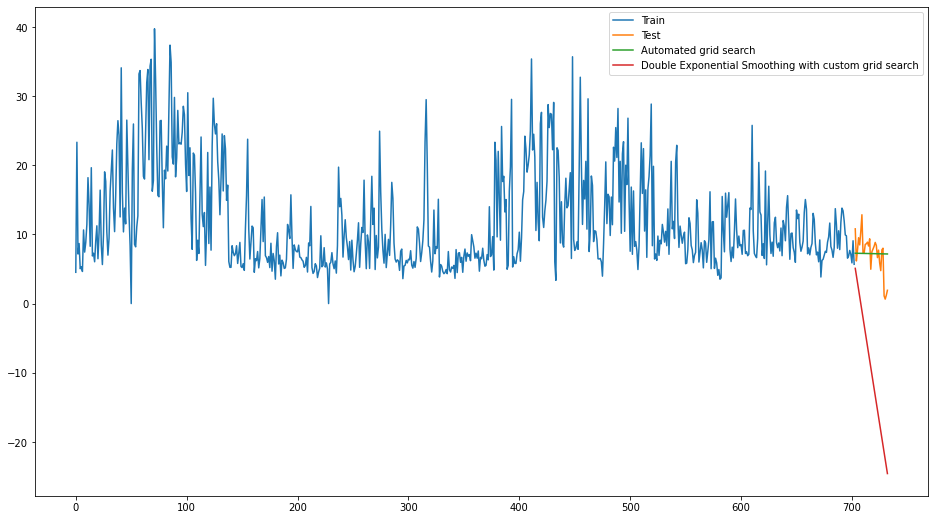

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(fitESAUTOpred, label='Automated grid search')
plt.plot(Forecast_custom_pred, label='Double Exponential Smoothing with custom grid search')
plt.legend(loc='best')
plt.show()

# Triple Exponential Smoothening

In [30]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

In [31]:
df.head()


,Date,usage,cost
0,2016-10-22,4.52,0.60
1,2016-10-23,23.32,4.36
2,2016-10-24,7.16,1.20
3,2016-10-25,8.68,1.60
4,2016-10-26,5.04,0.84


In [32]:
df = pd.read_csv(r'/content/Daily_Electricity_Consumption.csv',index_col=0,parse_dates=True)

In [33]:
df

,usage,cost
Date,,
2016-10-22,4.52,0.60
2016-10-23,23.32,4.36
2016-10-24,7.16,1.20
2016-10-25,8.68,1.60
2016-10-26,5.04,0.84
...,...,...
2018-10-20,8.00,1.68
2018-10-21,1.12,0.16
2018-10-22,0.64,0.04


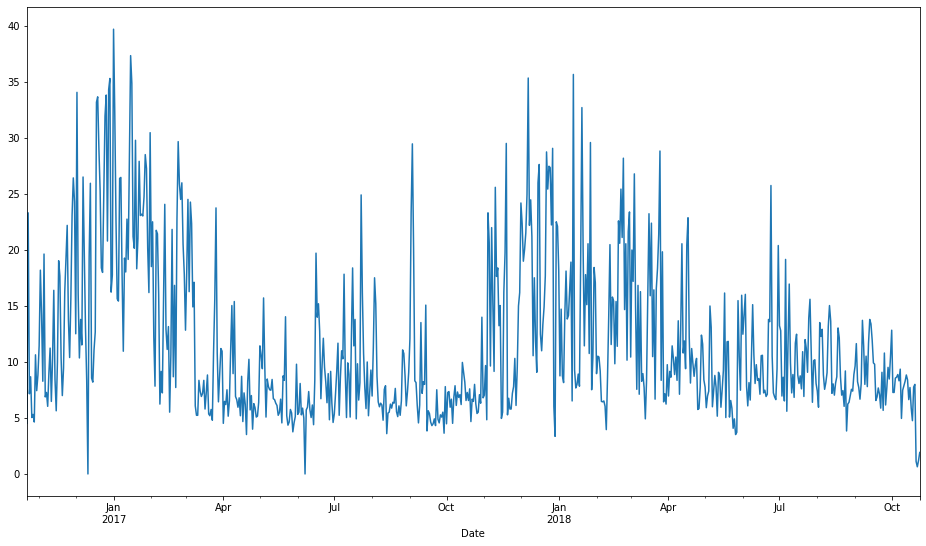

In [34]:
df['usage'].plot()

In [35]:
df_train = df.iloc[:-30]
df_test = df.iloc[-30:]

In [45]:
model = HWES(df_train['usage'], seasonal_periods=12, trend='add', seasonal='add')
fitted = model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [41]:
print(fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    usage   No. Observations:                  703
Model:             ExponentialSmoothing   SSE                          20916.713
Optimized:                         True   AIC                           2417.242
Trend:                         Additive   BIC                           2490.127
Seasonal:                      Additive   AICC                          2418.242
Seasonal Periods:                    12   Date:                 Mon, 05 Dec 2022
Box-Cox:                          False   Time:                         05:02:05
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.2877331                alpha                 True
smoothing_trend          

In [42]:
usage_forecast = fitted.forecast(steps=30)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


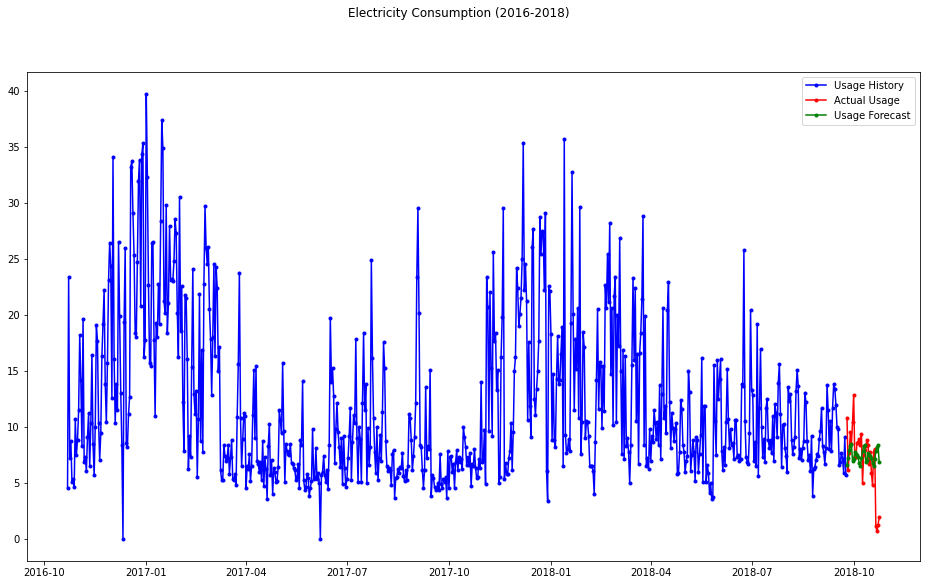

In [43]:
fig = plt.figure()
fig.suptitle('Electricity Consumption (2016-2018)')
past, = plt.plot(df_train['usage'].index, df_train['usage'], 'b.-', label='Usage History')
future, = plt.plot(df_test['usage'].index, df_test['usage'], 'r.-', label='Actual Usage')
predicted_future, = plt.plot(df_test['usage'].index, usage_forecast, 'g.-', label='Usage Forecast')
plt.legend(handles=[past, future, predicted_future])
plt.show()

**So Triple Exponential Smoothening Gives us best results on our data as the data has seasonality and trends.** 